In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
tips_data= sns.load_dataset('tips')

In [3]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# distribution of total bill and tip using histogram(matplotlib)


(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

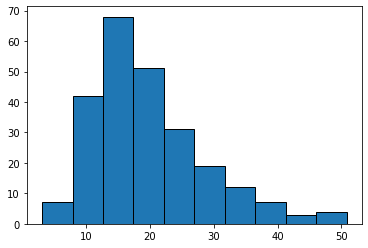

In [5]:
plt.hist(tips_data['total_bill'],edgecolor='black')

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

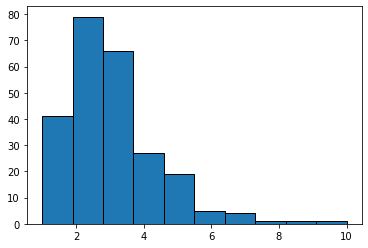

In [6]:
plt.hist(tips_data['tip'],edgecolor='black')

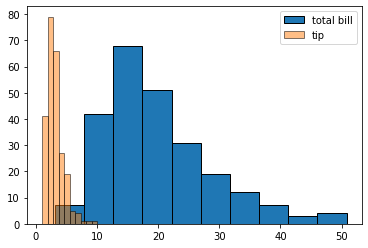

In [7]:
plt.hist(tips_data['total_bill'],edgecolor='black',label='total bill')
plt.hist(tips_data['tip'],edgecolor='black',label='tip',alpha=0.5)
plt.legend()

# distribution of total bill and tip using histogram(seaborn) 

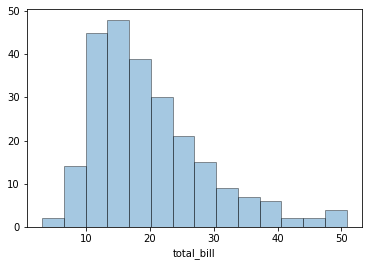

In [8]:
sns.distplot(tips_data['total_bill'],kde=False,hist_kws=dict(edgecolor='black'))

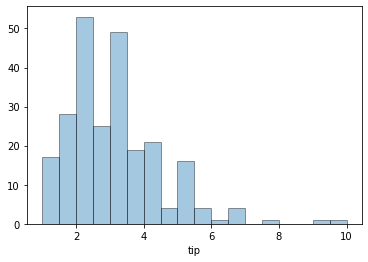

In [9]:
sns.distplot(tips_data['tip'],kde=False,hist_kws=dict(edgecolor='black'))

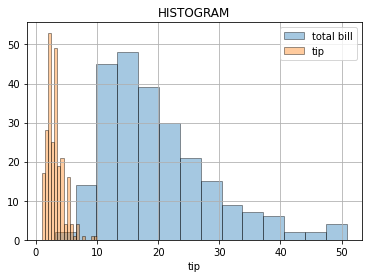

In [10]:
sns.distplot(tips_data['total_bill'],kde=False,hist_kws=dict(edgecolor='black',label='total bill')).set_title('HISTOGRAM')
sns.distplot(tips_data['tip'],kde=False,hist_kws=dict(edgecolor='black',label='tip'))
plt.legend()
plt.grid(True)

# distribution of total bill and tip using boxplot(seaborn) 

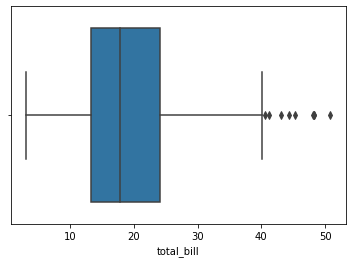

In [11]:
sns.boxplot(tips_data['total_bill'])

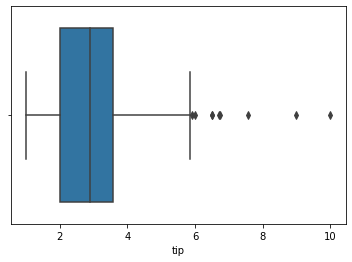

In [12]:
sns.boxplot(tips_data['tip'])

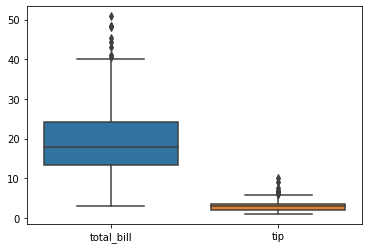

In [13]:
sns.boxplot(data=tips_data.loc[:,['total_bill','tip']])


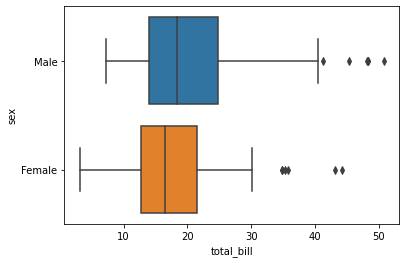

In [14]:
# different boxplot for male and female
sns.boxplot(tips_data['total_bill'],tips_data['sex'])

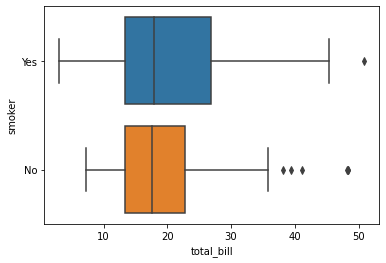

In [15]:
# smoker or non-smoker
sns.boxplot(tips_data['total_bill'],tips_data['smoker'])

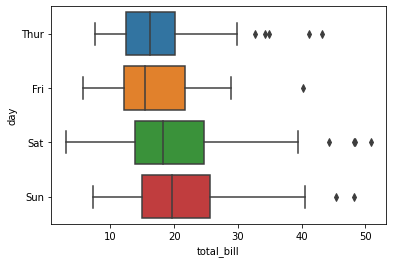

In [16]:
# days
sns.boxplot(tips_data['total_bill'],tips_data['day'])

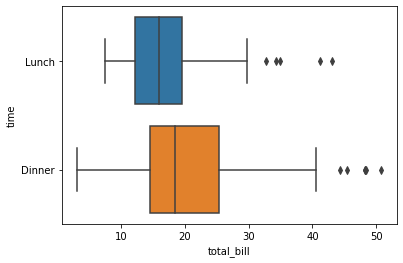

In [17]:
#time
sns.boxplot(tips_data['total_bill'],tips_data['time'])

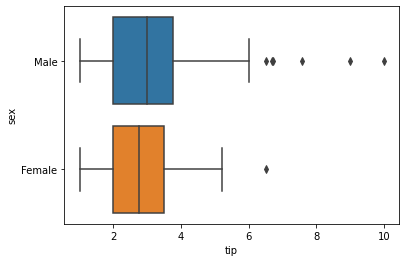

In [18]:
# tip distribution among different categories(sex,smoker,day,time)
sns.boxplot(tips_data['tip'],tips_data['sex'])

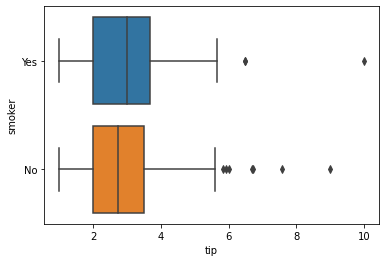

In [19]:
sns.boxplot(tips_data['tip'],tips_data['smoker'])

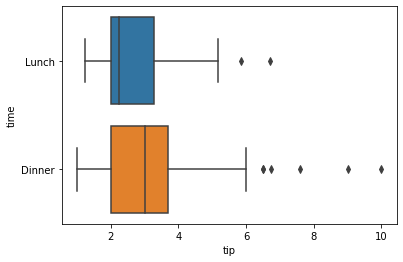

In [20]:
sns.boxplot(tips_data['tip'],tips_data['time'])

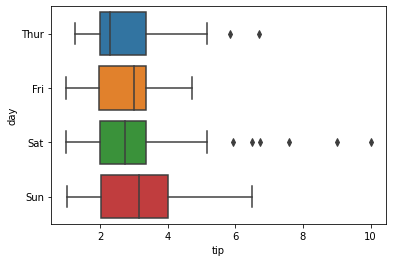

In [21]:
sns.boxplot(tips_data['tip'],tips_data['day'])

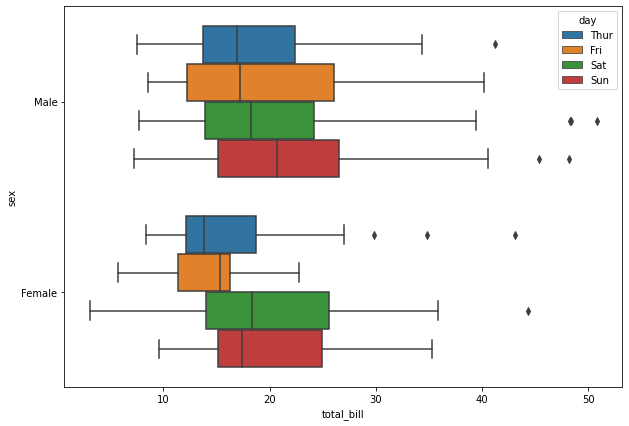

In [22]:
# distribution of total bill by gender and further dividing them by categories 
plt.figure(figsize=(10,7))
sns.boxplot(tips_data['total_bill'],tips_data['sex'],hue=tips_data['day'])

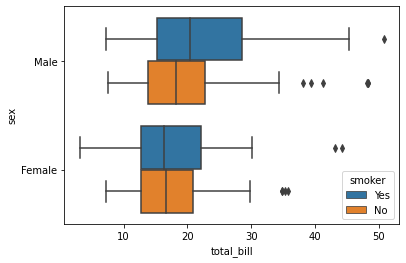

In [23]:
sns.boxplot(tips_data['total_bill'],tips_data['sex'],hue=tips_data['smoker'])

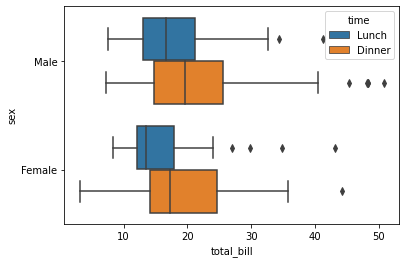

In [24]:
sns.boxplot(tips_data['total_bill'],tips_data['sex'],hue=tips_data['time'])

# is there a positive relationship between size and total bill?

Text(0, 0.5, 'total bill')

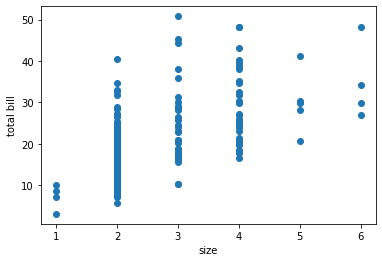

In [25]:
plt.scatter(tips_data['size'],tips_data['total_bill'])
plt.xlabel('size')
plt.ylabel('total bill')

Text(0, 0.5, 'tip')

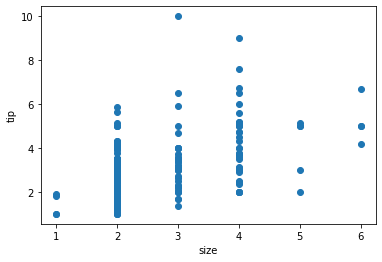

In [26]:
plt.scatter(tips_data['size'],tips_data['tip'])
plt.xlabel('size')
plt.ylabel('tip')

# is there a positive relationship between total bill and tip?


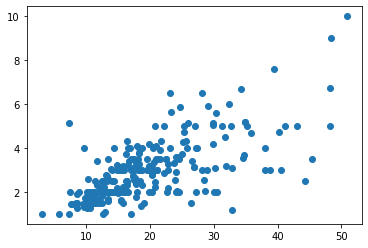

In [27]:
plt.scatter(tips_data['total_bill'],tips_data['tip'])

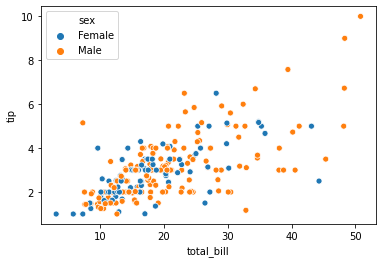

In [28]:
sns.scatterplot(tips_data['total_bill'],tips_data['tip'],hue=tips_data['sex'])

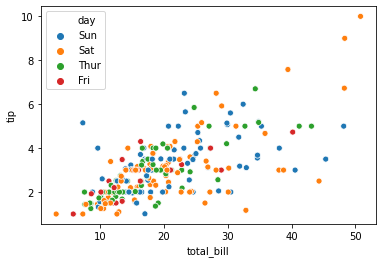

In [29]:
sns.scatterplot(tips_data['total_bill'],tips_data['tip'],hue=tips_data['day'])

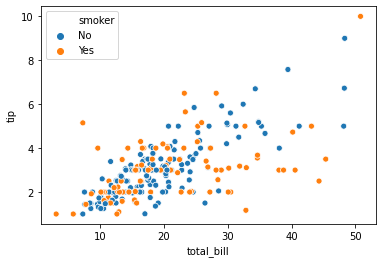

In [30]:
sns.scatterplot(tips_data['total_bill'],tips_data['tip'],hue=tips_data['smoker'])

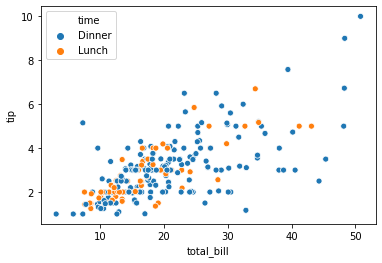

In [31]:
sns.scatterplot(tips_data['total_bill'],tips_data['tip'],hue=tips_data['time'])

# plot a regression line (x=total bill,y=tip)

In [32]:
import statsmodels.api as sm

In [33]:
x = tips_data['total_bill']
y = tips_data['tip']

In [34]:
x1= sm.add_constant(x)
result= sm.OLS(y,x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           6.69e-34
Time:                        11:31:56   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

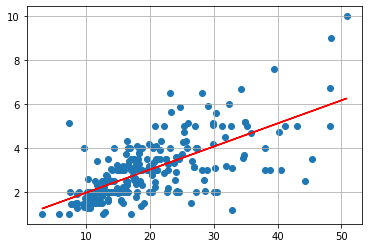

In [35]:
yhat= 0.1050*x + 0.9203
plt.scatter(tips_data['total_bill'],tips_data['tip'])
plt.plot(x,yhat,color='red')
plt.grid(True)

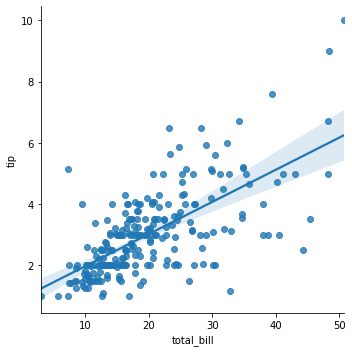

In [36]:
sns.lmplot(x='total_bill',y='tip',data=tips_data)

# FacetGrids

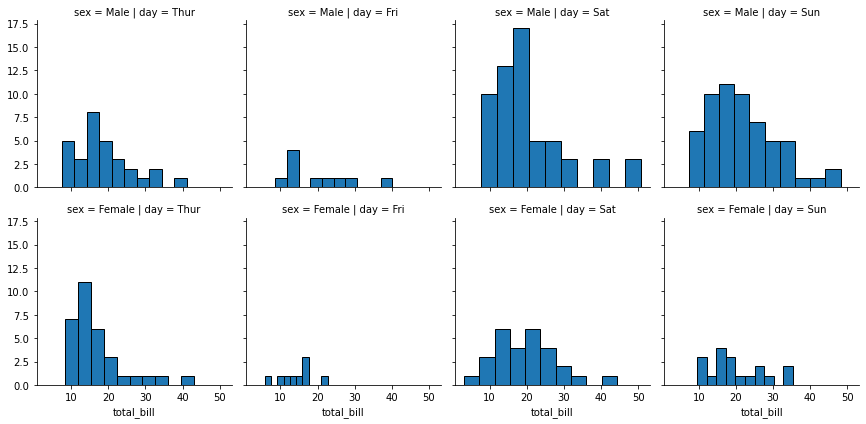

In [37]:
g= sns.FacetGrid(tips_data,row='sex',col='day')
g= g.map(plt.hist,'total_bill',edgecolor='black')

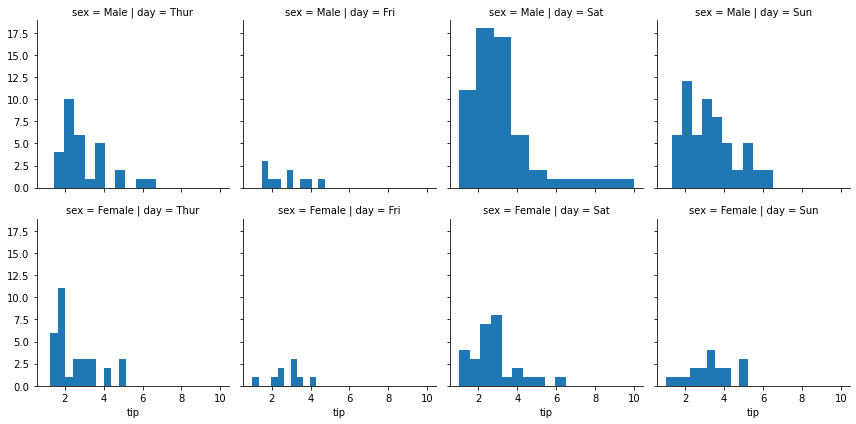

In [38]:
g= sns.FacetGrid(tips_data,row='sex',col='day')
g= g.map(plt.hist,'tip')

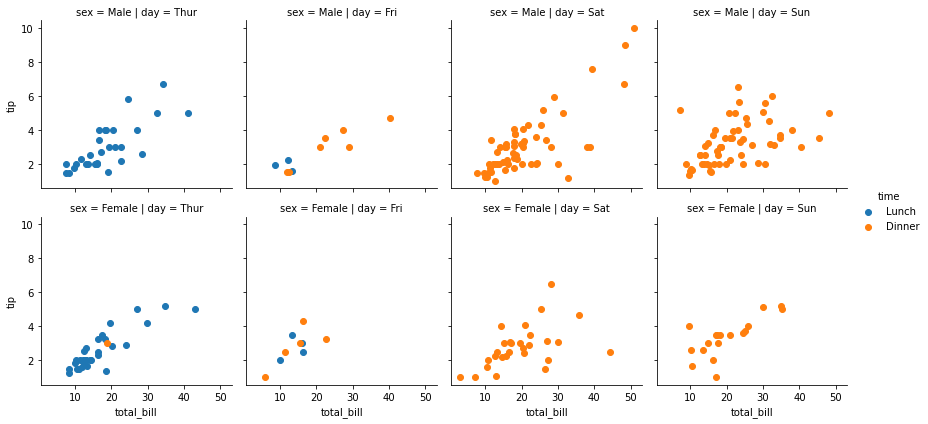

In [39]:
g= sns.FacetGrid(tips_data,row='sex',col='day',hue='time')
g= g.map(plt.scatter,'total_bill','tip').add_legend()

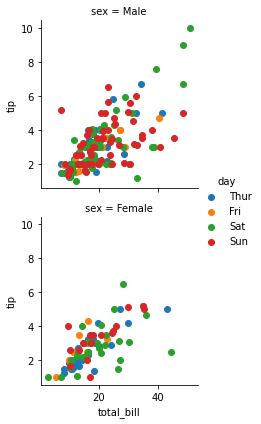

In [40]:
g= sns.FacetGrid(tips_data,row='sex',hue='day')
g= g.map(plt.scatter,'total_bill','tip').add_legend()